# Credit risk evaluation model with textual features from loan descriptions for P2P lending


## Data loading

In [1]:
import pandas as pd

raw_data = pd.read_csv('data/accepted_2007_to_2018q4.csv')
print(raw_data.columns.tolist())
raw_data.describe()

C:\Users\Jonah\AppData\Local\Temp\ipykernel_17772\1763151520.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('data/accepted_2007_to_2018q4.csv')


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


### Data preprocessing

In [3]:
selected_columns = [
    'issue_d',
    # target variable
    'loan_status',
    # loan characteristics
    'loan_amnt',
    'term',
    'int_rate',
    'purpose',
    # creditworthiness features
    'fico_range_low',
    'grade',
    'inq_last_6mths',
    'revol_util', # TODO should be percentage
    'delinq_2yrs',
    'pub_rec',
    'open_acc',
    'revolving_income_ratio',  # this needs to be checked. This is just a balance and not "The ratio of revolving line to monthly income" - Paper
    'total_acc',
    'credit_age',  # this is a date. "The number of months from the time at which the borrower opened his or her first credit card to the loan requests" - Paper
    # Solvency features
    'annual_inc',
    'emp_length',
    'home_ownership',
    'verification_status',
    'dti',
    # Description
    'desc',
]


filtered_data = raw_data.copy()
filtered_data['issue_d'] = pd.to_datetime(filtered_data['issue_d'], format='%b-%Y')
filtered_data = filtered_data[filtered_data['issue_d'] <= '2014-12-31']

filtered_data['earliest_cr_line'] = pd.to_datetime(filtered_data['earliest_cr_line'], format='%b-%Y')
filtered_data["credit_age"] = (filtered_data["issue_d"] - filtered_data["earliest_cr_line"]).dt.days / 30

filtered_data['revolving_income_ratio'] = filtered_data['total_rev_hi_lim'] / (filtered_data['annual_inc'] / 12)
filtered_data = filtered_data.query("desc.str.len() >= 20")

filtered_data = filtered_data[selected_columns]
filtered_data = filtered_data.dropna()
filtered_data.to_parquet('data/filtered_data.parquet')
filtered_data.describe()


,loan_amnt,int_rate,fico_range_low,inq_last_6mths,revol_util,delinq_2yrs,pub_rec,open_acc,revolving_income_ratio,total_acc,credit_age,annual_inc,dti
count,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,75751.000000,7.575100e+04,75751.000000
mean,15067.831118,13.941740,696.243680,0.819105,58.151462,0.264115,0.133516,11.329817,5.352822,25.529696,194.036903,7.553684e+04,17.302494
std,8029.844603,4.378926,29.916977,1.050112,22.647010,0.743134,0.432532,4.711659,4.004387,11.187241,84.216248,5.412655e+04,7.536755
min,1000.000000,6.000000,660.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.026526,2.000000,36.533333,8.400000e+03,0.000000
25%,9000.000000,10.990000,675.000000,0.000000,42.300000,0.000000,0.000000,8.000000,2.747324,17.000000,137.966667,4.800000e+04,11.630000
50%,14000.000000,13.670000,690.000000,0.000000,59.900000,0.000000,0.000000,11.000000,4.427184,24.000000,177.600000,6.500000e+04,16.980000
75%,20000.000000,16.780000,710.000000,1.000000,75.900000,0.000000,0.000000,14.000000,6.800000,32.000000,236.433333,9.000000e+04,22.760000
max,35000.000000,26.060000,845.000000,7.000000,120.200000,22.000000,17.000000,62.000000,78.433735,105.000000,760.900000,7.141778e+06,34.990000


## Data exploration

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
filtered_data = pd.read_parquet('data/filtered_data.parquet')

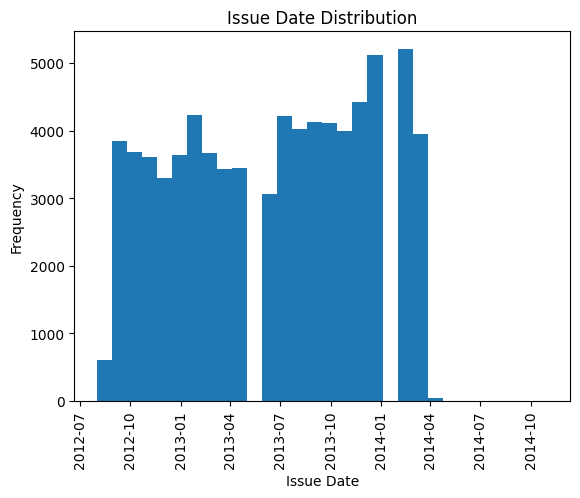

In [31]:
plt.hist(filtered_data['issue_d'], bins=30)
plt.title('Issue Date Distribution')
plt.xlabel('Issue Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

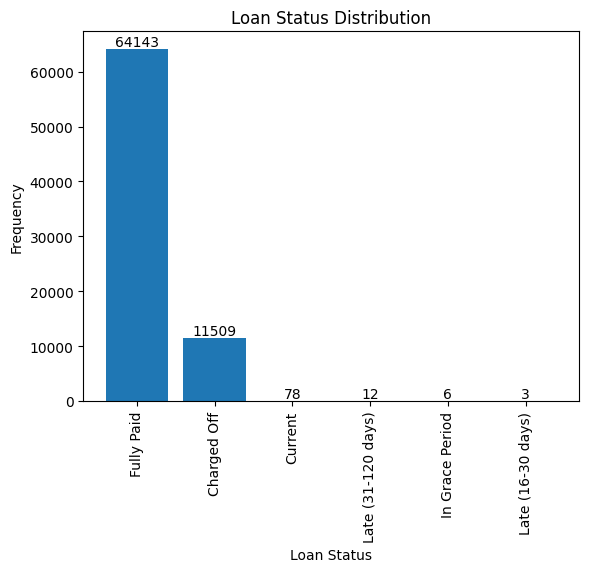

In [32]:
loan_status_values = filtered_data['loan_status'].unique()

loan_status_counts = filtered_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Loan Status Distribution')
for i, count in enumerate(loan_status_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [33]:
# remove loans that are current or late
filtered_data = filtered_data[filtered_data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

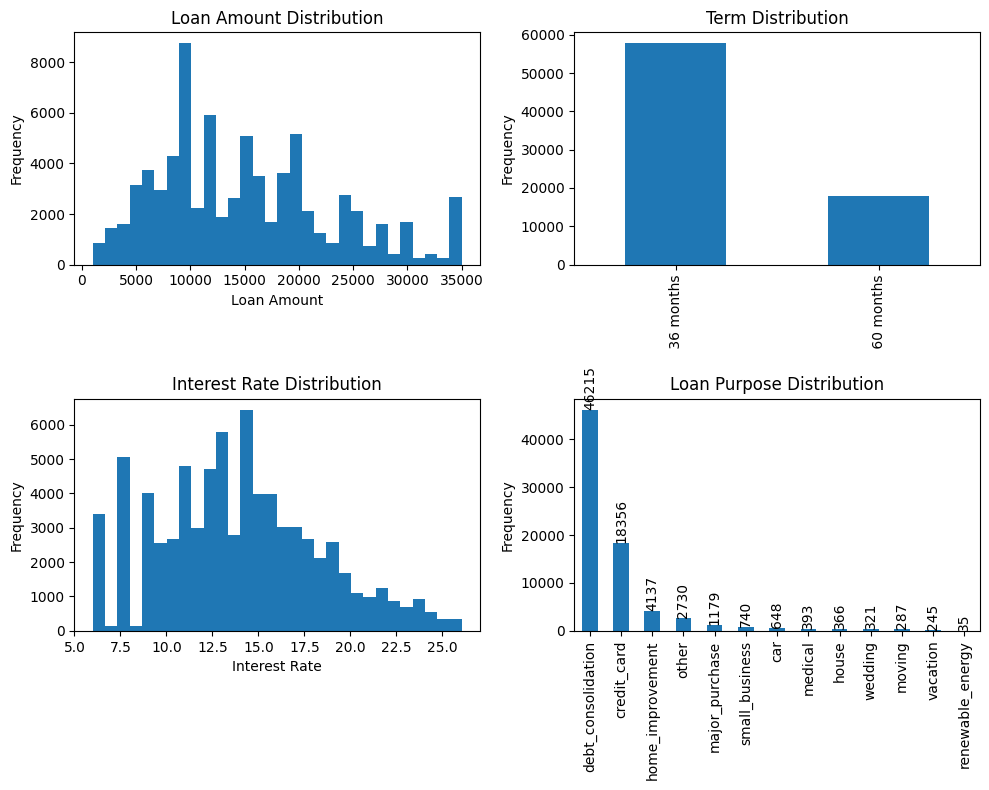

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot loan amount
axs[0, 0].hist(filtered_data['loan_amnt'], bins=30)
axs[0, 0].set_title('Loan Amount Distribution')
axs[0, 0].set_xlabel('Loan Amount')
axs[0, 0].set_ylabel('Frequency')

# Plot term
filtered_data['term'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Term Distribution')
axs[0, 1].set_ylabel('Frequency')

# Plot interest rate
axs[1, 0].hist(filtered_data['int_rate'], bins=30)
axs[1, 0].set_title('Interest Rate Distribution')
axs[1, 0].set_xlabel('Interest Rate')
axs[1, 0].set_ylabel('Frequency')

# Plot loan purpose
filtered_data['purpose'].value_counts().plot(kind='bar', ax=axs[1, 1])

axs[1, 1].set_title('Loan Purpose Distribution')
axs[1, 1].set_ylabel('Frequency')

# Add counts over the bars
for i, count in enumerate(filtered_data['purpose'].value_counts()):
    axs[1, 1].text(i, count, str(count), ha='center', va='bottom', rotation=90)


plt.tight_layout()
plt.show()


#### Creditworthiness features

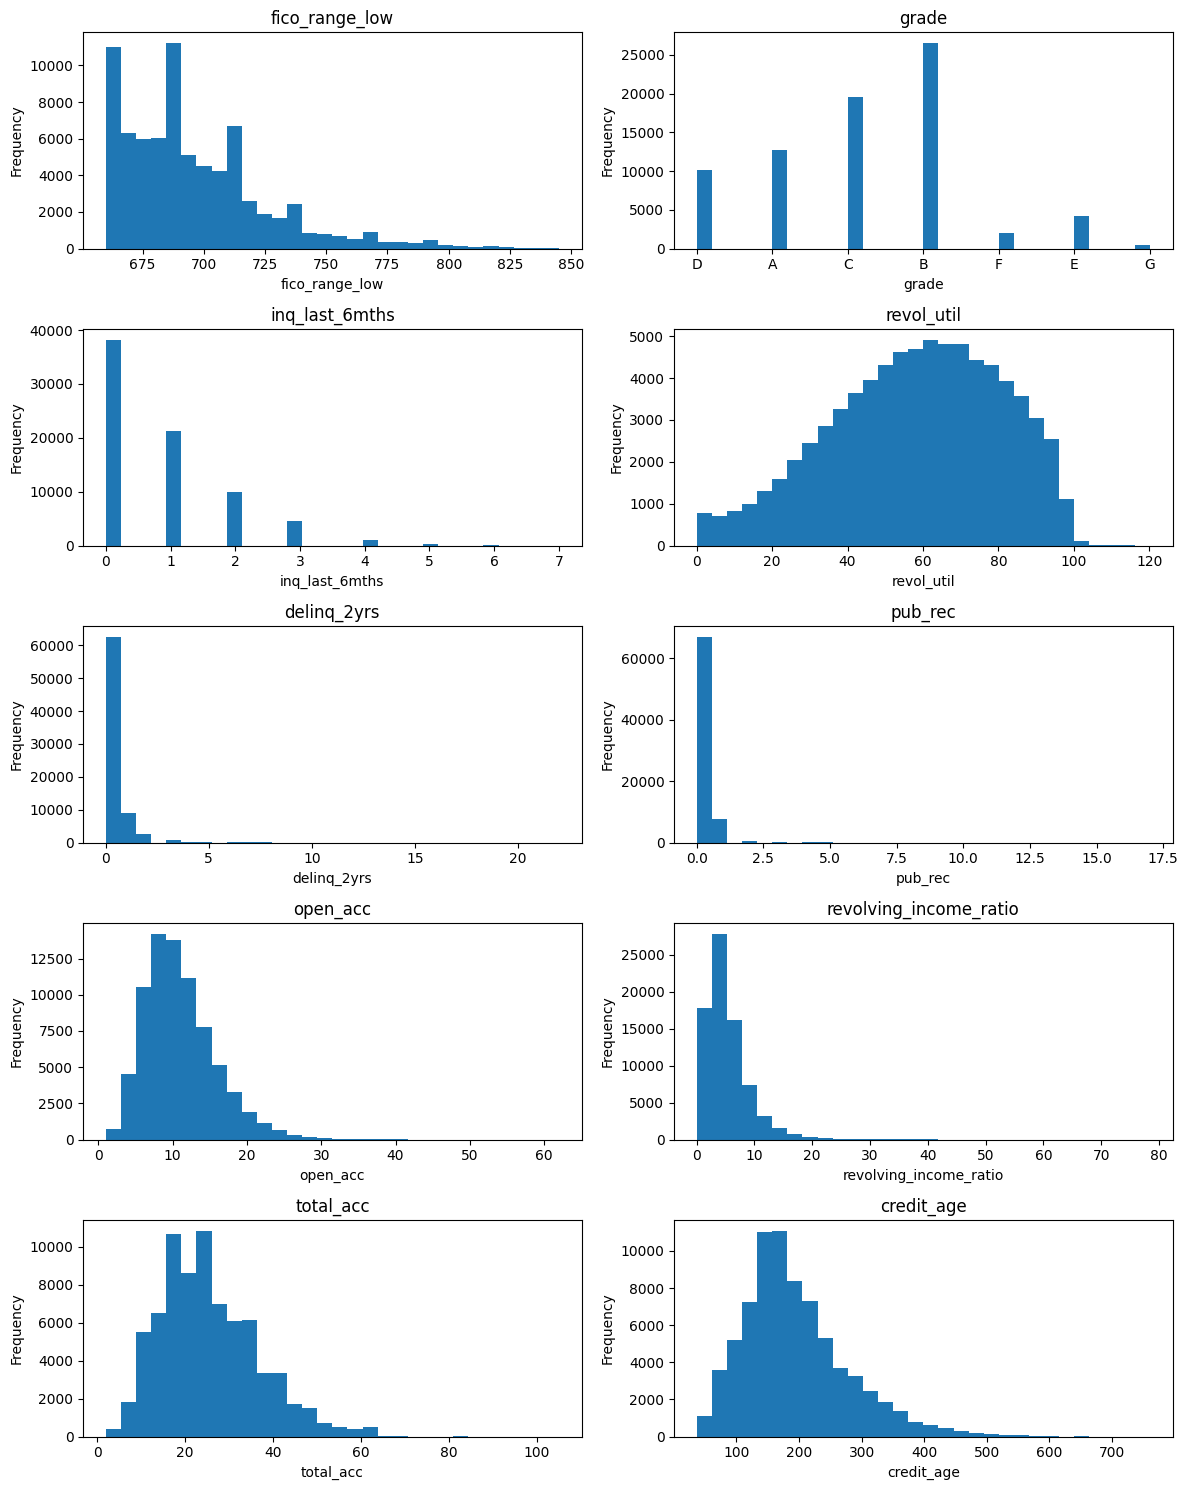

In [35]:
import matplotlib.pyplot as plt

creditworthiness_features = ['fico_range_low', 'grade', 'inq_last_6mths', 'revol_util', 'delinq_2yrs', 'pub_rec', 'open_acc', 'revolving_income_ratio', 'total_acc', 'credit_age']

fig, axs = plt.subplots(5, 2, figsize=(12, 15))

for i, feature in enumerate(creditworthiness_features):
    row = i // 2
    col = i % 2
    axs[row, col].hist(filtered_data[feature], bins=30)
    axs[row, col].set_title(feature)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Solvency features

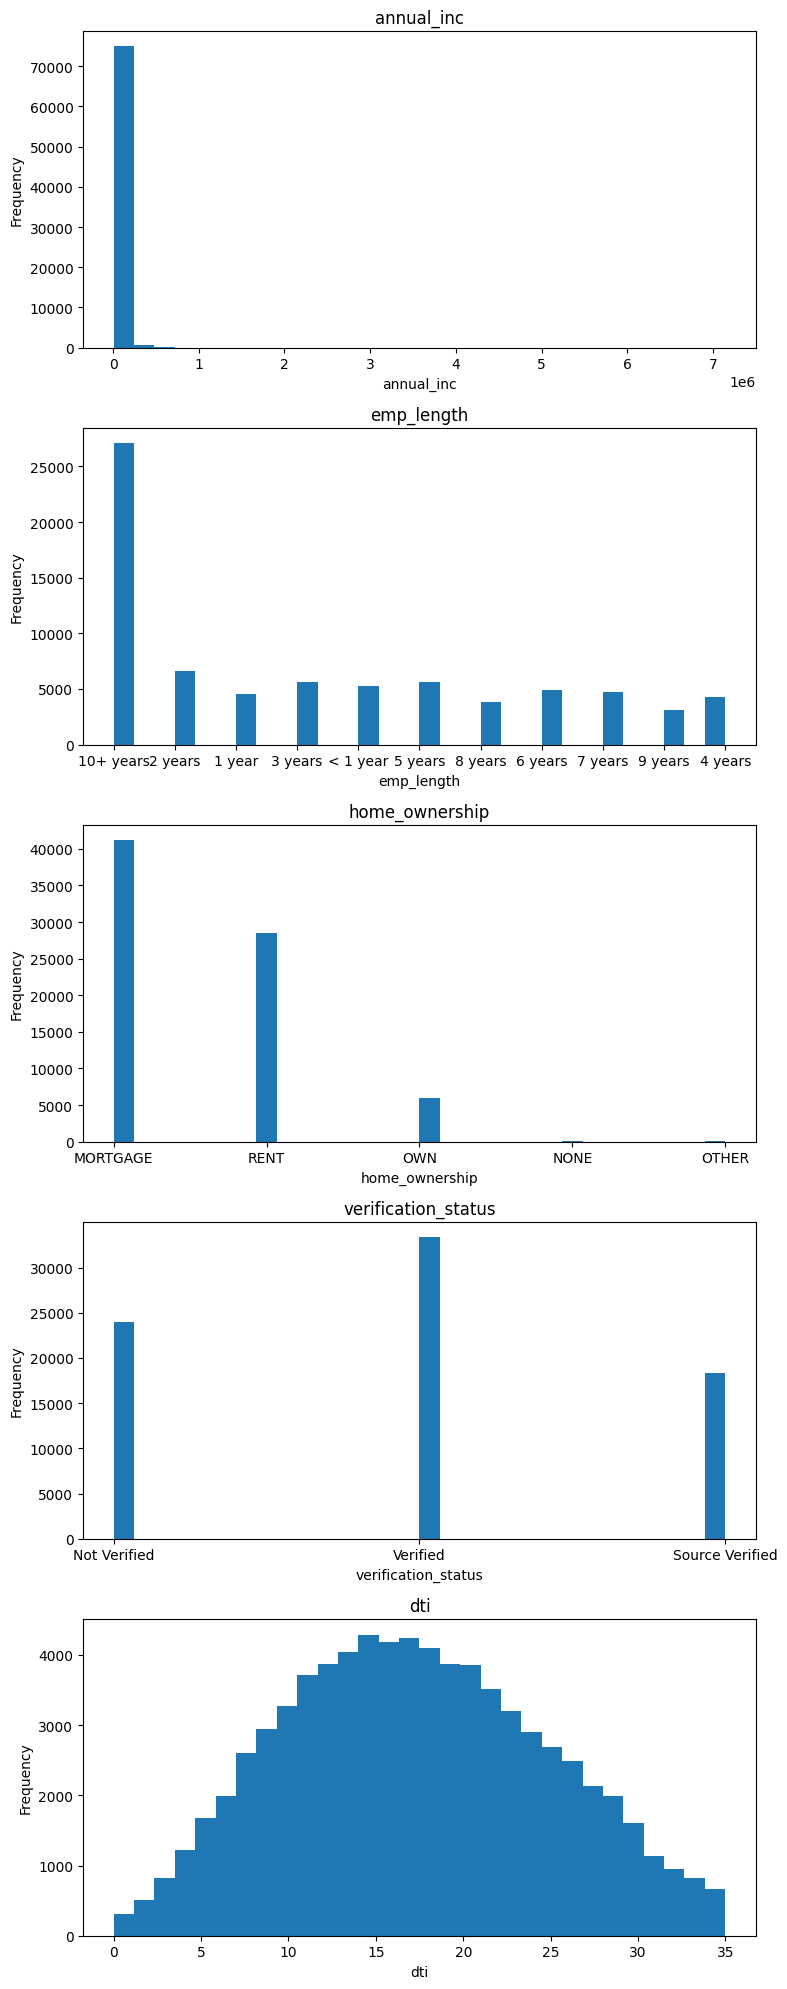

In [36]:
solvency_features = ['annual_inc',
    'emp_length',
    'home_ownership',
    'verification_status',
    'dti']

fig, axs = plt.subplots(5, 1, figsize=(8, 20))

for i, feature in enumerate(solvency_features):
    axs[i].hist(filtered_data[feature], bins=30)
    axs[i].set_title(feature)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

### Encode categorical features

In [37]:
one_hot_encode_features = ['term','purpose', 'home_ownership', 'verification_status']
filtered_data = pd.get_dummies(filtered_data, columns=one_hot_encode_features)
filtered_data


,issue_d,loan_status,loan_amnt,int_rate,fico_range_low,grade,inq_last_6mths,revol_util,delinq_2yrs,pub_rec,...,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1146602,2014-11-01,Fully Paid,3200.0,15.59,720.0,D,2.0,16.3,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1180006,2014-10-01,Fully Paid,28000.0,7.12,715.0,A,0.0,49.6,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1212721,2014-08-01,Charged Off,25000.0,16.99,660.0,D,0.0,66.3,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1226216,2014-07-01,Fully Paid,12150.0,14.99,680.0,C,1.0,49.3,1.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1309219,2014-03-01,Fully Paid,21000.0,16.59,690.0,D,3.0,18.5,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911796,2012-08-01,Fully Paid,19125.0,15.31,690.0,C,2.0,49.8,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1911798,2012-08-01,Fully Paid,10000.0,11.14,700.0,B,0.0,29.8,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1911799,2012-08-01,Charged Off,16000.0,17.77,670.0,D,0.0,61.4,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1911800,2012-08-01,Fully Paid,6000.0,6.03,775.0,A,0.0,7.7,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [41]:
grade_mapping = {'G': 0, 'F': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6}
filtered_data['grade'] = filtered_data['grade'].map(grade_mapping)/6
filtered_data['grade']


1146602    D
1180006    A
1212721    D
1226216    C
1309219    D
          ..
1911796    C
1911798    B
1911799    D
1911800    A
1911801    D
Name: grade, Length: 75751, dtype: object


1146602    0.500000
1180006    1.000000
1212721    0.500000
1226216    0.666667
1309219    0.500000
             ...   
1911796    0.666667
1911798    0.833333
1911799    0.500000
1911800    1.000000
1911801    0.500000
Name: grade, Length: 75751, dtype: float64

In [53]:
# employment length
indexes = filtered_data[filtered_data['emp_length'] == '< 1 year'].index
filtered_data['emp_length'] = filtered_data['emp_length'].str.extract('(\d+)').astype(float)
filtered_data.loc[indexes, 'emp_length'] = 0.5
filtered_data['emp_length'].unique()

array([10. ,  2. ,  1. ,  3. ,  0.5,  5. ,  8. ,  6. ,  7. ,  9. ,  4. ])

In [54]:
import numpy as np

filtered_data['loan_amnt'] = np.log(filtered_data['loan_amnt'])
filtered_data['annual_inc'] = np.log(filtered_data['annual_inc'])